<h1>Imports, dataset generate, splitting the data, plotting the dataset</h1>

In [1]:
# importing required libraries
from tqdm import tqdm
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
# generating a random n-class classification problem.
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

Scatter plots for train and test data

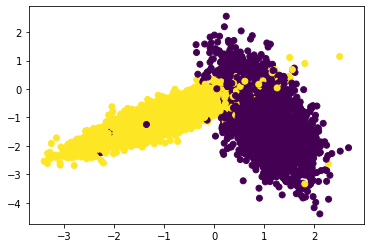

In [3]:
# scatter plot for train data
plt.scatter(X_train[:,0], X_train[:,1],c=y_train)
plt.show()

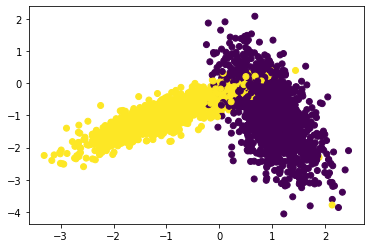

In [4]:
# scatter plot for test data
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

<h1>GridSearchCV from Scratch Implementation without using SKLearn</h1>

Function definition for custom Grid Search CV

In [6]:
def customGridSearch(x_train, y_train, classifier, list_of_parameters, folds):

  # empty lists to store k fold appended train and cv scores for particular parameter
  train_scores, cv_scores = [], []

  # printing the parameters values
  print('\n These are the hardcoded parameters - \n',list_of_parameters)

  # params dictionary
  params = {'n_neighbors' : list_of_parameters}
  
  for k in tqdm(params['n_neighbors']):

    # empty lists to store training and cv scores for 1 fold (it will store for all the 11 parameters)
    folds_train_scores, folds_cv_scores = [], []

    for j in range(0, folds):

      # divide the training data into groups(e.g. for k=3, (7500/3=2500 points in each group); 3 such groups)
      groups = int(len(x_train)/ (folds))

      # cv_indices will contain values in betweeen 2 groups(e.g. if groups are 3, then for some iteration, group 1 for cv_indices and remaining 2 groups for train_indices)
      cv_indices = list(set(list(range((groups*j), (groups*(j+1))))))
      # points remaining from x_train after alloting some for cv_indices
      train_indices = list(set(list(range(0, len(x_train)))) - set(cv_indices))

      # select data points(X,Y) from train and cv indices 
      # training data points
      X_train = x_train[train_indices] 
      Y_train = y_train[train_indices]
      # cv data points
      X_cv = x_train[cv_indices]
      Y_cv = y_train[cv_indices]

      # assigning particular parameter value from 11 parameter values to K Neighbors Classifier
      classifier.n_neighbors = k
      # training the data
      classifier.fit(X_train,Y_train)

      # predicting for CV data
      Y_predicted = classifier.predict(X_cv)
      folds_cv_scores.append(accuracy_score(Y_cv, Y_predicted))

      # predicting for training data
      Y_predicted = classifier.predict(X_train)
      folds_train_scores.append(accuracy_score(Y_train, Y_predicted))

    # storing the mean of all folds scores(train, CV) for particular value of parameter out of 11 parameters
    train_scores.append(np.mean(np.array(folds_train_scores)))
    cv_scores.append(np.mean(np.array(folds_cv_scores)))

  return train_scores, cv_scores, params

Calling the above defined function with different parameters and Plotting the train-cv curve

  0%|          | 0/11 [00:00<?, ?it/s]


 These are the hardcoded parameters - 
 [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


100%|██████████| 11/11 [00:19<00:00,  1.76s/it]



 Hyper-parameters VS Accuracy Plot ->


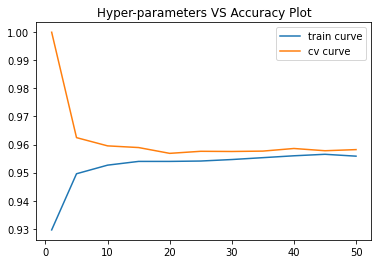

In [8]:
list_of_parameters = [1,5,10,15,20,25,30,35,40,45,50]
folds = 3

# calling KNeighborsClassifier() function
knn = KNeighborsClassifier()

cv_scores, train_scores, params = customGridSearch(X_train, y_train, knn, list_of_parameters, folds)

# plotting the necessary curves with the help of matplotlib.pyplot library
print('\n Hyper-parameters VS Accuracy Plot ->')
# training curve
plt.plot(params['n_neighbors'], train_scores, label = 'train curve')  
# CV curve
plt.plot(params['n_neighbors'], cv_scores, label = 'cv curve')  

plt.title('Hyper-parameters VS Accuracy Plot')
plt.legend()
plt.show()

To obtain the best k(parameter) value, select the point in the graph, where CV curve shows highest accuracy as well as the gap between train curve-cv curve should be minimum.
<br>
Such condition can be found out at k = 40 where CV accuracy is nearly 96%

**Note** : We will get same Hyper-parameters VS Accuracy Plot each time as we are providing fixed parameters(k values). <br>
We will get deterministic output.

<h2>Decision Boundary Plots</h2>

In [9]:
def decision_boundary_plot(X1,X2,y,clf):
  # creating color maps
  color_map_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
  color_map_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

  x_min, x_max = X1.min() - 1, X1.max() + 1
  y_min, y_max = X2.min() - 1, X2.max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
  # ravel() returns contiguous flattened array # reference - https://www.geeksforgeeks.org/numpy-ravel-python/
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  
  Z = Z.reshape(xx.shape)

  plt.figure()
  plt.pcolormesh(xx, yy, Z, cmap=color_map_light)
  plt.scatter(X1, X2, c=y, cmap=color_map_bold)

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title('Binary Classification (k = %i)' % (clf.n_neighbors))
  plt.show()

<b>Decision Boundary Plot for best hyperparameter obtained</b>

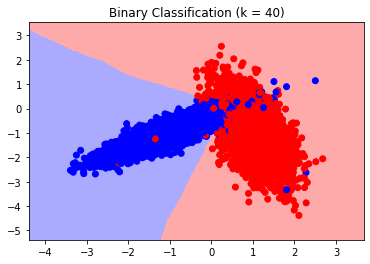

In [10]:
# provide any value of parameter(mostly best parameter) to obtain its corresponding decision boundary plot
knn = KNeighborsClassifier(n_neighbors = 40)
knn.fit(X_train, y_train)
decision_boundary_plot(X_train[:, 0], X_train[:, 1], y_train, knn)

Here, the decision boundary separates the red and blue points pretty well. There are some outliers present though. 

<b>Decision Boundary Plot for hyperparameter k=1</b>

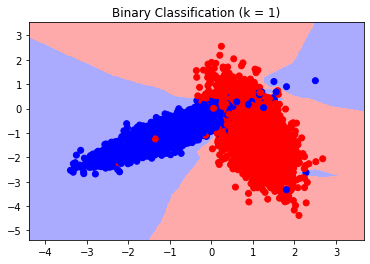

In [11]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
decision_boundary_plot(X_train[:, 0], X_train[:, 1], y_train, knn)

If we try for k = 1(1 neighbor max), we can see, there are decision boundaries for outliers as well which is not good. <br>
<u>Therefore, hyperparameter tuning is very important.</u>